In [2]:
import pandas as pd
import numpy as np
import mglearn
import graphviz
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

### MLP를 two_moons 데이터셋에 적용
- 은닉 유닛의 개수는 따로 설정 X, -기본값 100개

In [15]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

In [16]:
x, y = make_moons(n_samples = 100, noise=0.25, random_state=3)

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, 
                                                  random_state=42)

In [17]:
mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(x_train, y_train)

Text(0, 0.5, 'property 1')

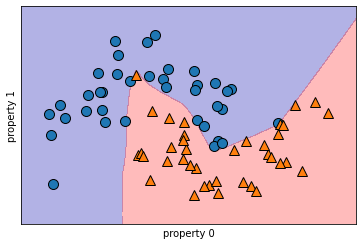

In [9]:
mglearn.plots.plot_2d_separator(mlp, x_train, fill=True, alpha=0.3) # alpha=3이었을 때 그래프 안나왔음 왜??
mglearn.discrete_scatter(x_train[:, 0], x_train[:, 1], y_train)
plt.xlabel('property 0')
plt.ylabel('property 1')

In [12]:
# 은닉유닛의 수 10개오 감소시켜주기
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10])
mlp.fit(x_train, y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(hidden_layer_sizes=[10], random_state=0, solver='lbfgs')

Text(0, 0.5, 'property 1')

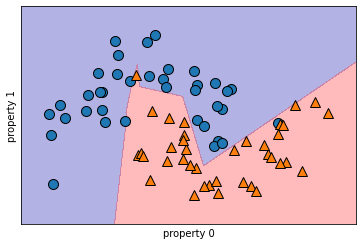

In [13]:
mglearn.plots.plot_2d_separator(mlp, x_train, fill=True, alpha=.3)
mglearn.discrete_scatter(x_train[:,0], x_train[:, 1], y_train)
plt.xlabel('property 0')
plt.ylabel('property 1')

이 데이터셋에서 유닛의 개수를 줄여도 여전히 좋은 결과를 얻을 수 있다.

더 매끄러운 결정경계를 원할 경우 다음과 같은 매개변수 조정을 생각할 수 있다.
- 은닉유닛 추가
- 은닉층 추가
- 활성화 함수 사용

In [22]:
# 10개의 유닛으로 된 두 개의 은닉층

mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10, 10]) # -> 10개의 유닛으로된 2개의 은닉층
mlp.fit(x_train, y_train)

MLPClassifier(hidden_layer_sizes=[10, 10], random_state=0, solver='lbfgs')

Text(0, 0.5, 'property 1')

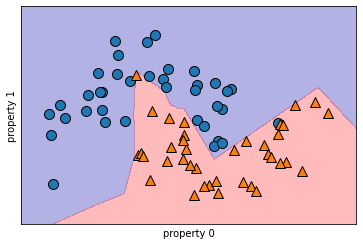

In [23]:
mglearn.plots.plot_2d_separator(mlp, x_train, fill=True, alpha=.3)
mglearn.discrete_scatter(x_train[:,0], x_train[:, 1], y_train)
plt.xlabel('property 0')
plt.ylabel('property 1')

In [24]:
# 활성화 함수 추가
# 10개의 우닛으로 된 두 개의 은닉층

In [25]:
mlp = MLPClassifier(solver='lbfgs', activation='tanh', 
                   random_state=0, hidden_layer_sizes=[10,10]).fit(x_train, y_train)

Text(0, 0.5, 'property 1')

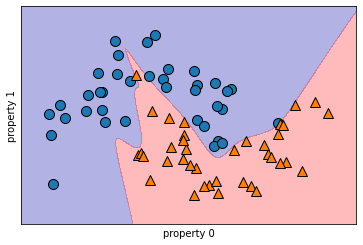

In [26]:
mglearn.plots.plot_2d_separator(mlp, x_train, fill=True, alpha=.3)
mglearn.discrete_scatter(x_train[:,0], x_train[:, 1], y_train)
plt.xlabel('property 0')
plt.ylabel('property 1')

activation() 함수를 적용하면 결졍 경계를 부드럽게 만들 수 있다.

#### 가중치
- MLP 신경망 모델도 리지 회귀에서처럼 L2 패널티를 사용해 가중치를 0에 가깝게 감소시켜 모델의 복잡도를 제어 할 수 있다.

C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


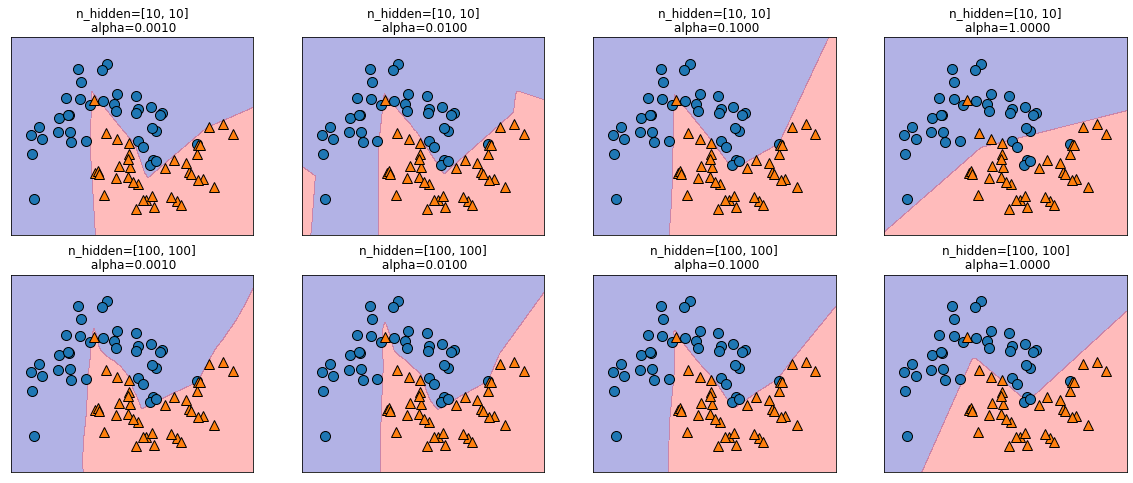

In [32]:
fig, axes = plt.subplots(2, 4, figsize=(20,8)) # 2행 4열
    
for axx, n_hidden_nodes in zip(axes,[10,100]) :
    for ax, alpha in zip (axx, [0.001,0.01,0.1,1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0, 
                        hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes],
                       alpha=alpha)
        mlp.fit(x_train, y_train)
        
        mglearn.plots.plot_2d_separator(mlp, x_train, fill=True, 
                                        alpha=.3, ax=ax)
        mglearn.discrete_scatter(x_train[:,0], x_train[:,1], y_train, ax=ax)
        ax.set_title('n_hidden=[{}, {}]\n alpha={:.4f}'.format(n_hidden_nodes,
                                                               n_hidden_nodes,
                                                               alpha))

### 초기 무작위 가중치

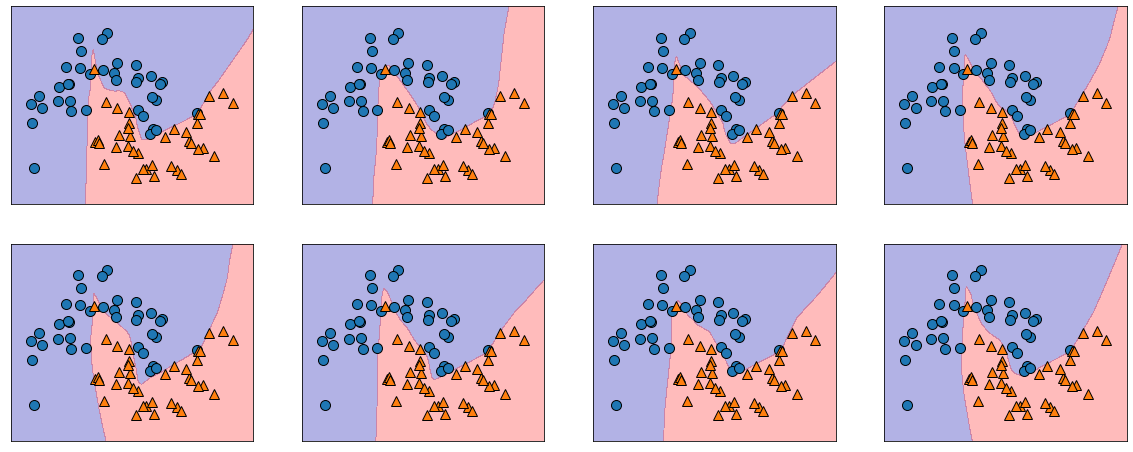

In [37]:
fig, axes = plt.subplots(2, 4, figsize=(20,8))

for i, ax in enumerate(axes.ravel()): # 1차원 변환
    mlp = MLPClassifier(solver='lbfgs', random_state=i,
                       hidden_layer_sizes=[100, 100])
    mlp.fit(x_train, y_train)
    
    mglearn.plots.plot_2d_separator(mlp, x_train, fill=True, alpha=.3, ax=ax)
    mglearn.discrete_scatter(x_train[:,0], x_train[:,1], y_train, ax=ax)